<a href="https://colab.research.google.com/github/yohenthounaojam/hamiltonian/blob/master/Hamiltonian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hamiltonian

---



### Creating a random graph with the following specs:
- Minimum number of nodes = 100
- Minimum degree of each node = 1



The number of vertices in this graph is 101


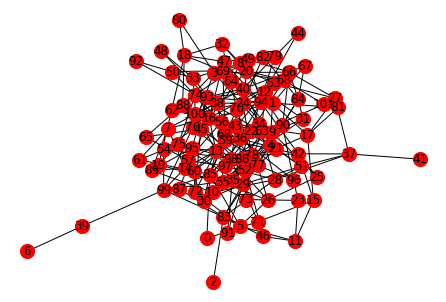

In [186]:
# Importing the libraries below
import networkx as nx
import random
import matplotlib.pyplot as plt

# Creating new graph
graph = nx.Graph()

# Generating a random number of vertices between 100 and 150
vertices=random.randrange(100,150)
print("The number of vertices in this graph is "+str(vertices))

# Adding nodes
for i in range(vertices+1):
  graph.add_node(i)

#Adding randomly generated edges
for i in range(vertices+1):
  connections=random.randrange(1,5)
  for j in range(connections):
   graph.add_edge(i,random.randrange(0,vertices)) 

#Plotting the graph generated. 
nx.draw(graph,with_labels=True,node_size=200, node_color="red")
plt.show()



---
Now randomly selecting two nodes **x** and **y**


In [187]:
x = random.randrange(1,vertices)
y = x
# Making sure x and y are not the same. To avoid a cycle. 
while(y==x):
  y=random.randrange(1,vertices)
  
print("x is: " + str(x))
print("y is: " + str(y))

x is: 10
y is: 75


In [0]:
def hamiltonianHelp(graph, x, y, visited, path,exists,start, dest): 
  # Marking the current vertex/node as True; visited. 
  visited[x]= True
  # Adding the visited node to the path array
  path.append(x) 

  # If the current node is the same as y, then print the path 
  # **Important condition: Only print the path if the len(path) is the same as number of nodes. 
  # The above condition ensures that all nodes have been visited once and once only. 
  if x==y: 
    if (len(path)==vertices):
      print(path) 
      exists=1
  else: 
    # If current ndoe is not x , recursively call for each adjacent vertex.
    if len(graph[x])<2 and (x!=start or x!=dest):
      exists=0
      return
    for i in graph[x]: 
        if visited[i]==False: 
            hamiltonianHelp(graph, i, y, visited, path, exists, start, dest) 
              
  # Finally remove the current vertex from path and mark it as unvisited.  
  path.pop() 
  visited[x]= False
   

def hamiltonianPaths(graph,x, y): 
    # Marking all the vertices as False; not visited.  
    visited =[False]*(len(graph)) 
    start=x
    dest=y
    # Output Decider
    exists=0

    # Empty array to store all paths between x and y
    path = [] 

    # Calling recursive helper fucntion.  
    hamiltonianHelp(graph, x, y,visited, path,exists, start, dest) 
    if exists!=0:
      print("No Hamiltonian Paths")
    else:
      print("The above are the Hamiltonian Paths present in the graph between vertics "+ str(x) +  " and "+ str(y))

hamiltonianPaths(graph,x,y) 



---
Sample Run for 5 nodes. 


The number of vertices in this graph is 5


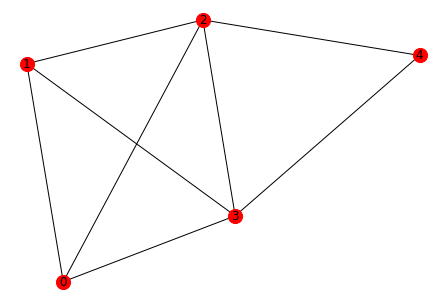

[1, 0, 3, 2, 4]
[1, 0, 2, 3, 4]
[1, 3, 0, 2, 4]
[1, 2, 0, 3, 4]
The above are the Hamiltonian Paths present in the graph between vertics 1 and 4


In [195]:
graph = nx.Graph()
vertices=5
print("The number of vertices in this graph is "+str(vertices))
graph.add_edge(0,1)
graph.add_edge(0,3)
graph.add_edge(0,2)
graph.add_edge(1,3)
graph.add_edge(1,2)
graph.add_edge(4,2)
graph.add_edge(4,3)
graph.add_edge(2,3)

#Plotting the graph generated. 
nx.draw(graph,with_labels=True,node_size=200, node_color="red")
plt.show()

hamiltonianPaths(graph,1,4) 




---

 Please omit the code below. 

Performing a simple DFS.
Was used for reference for the above code.

In [184]:
def DFSUtil(x, graph, visited,nodes): 
    visited[x] = True
    print(x, end = '-')
    nodes.append(x)
    for i in graph[x]: 
      if visited[i] == False:  
        DFSUtil(i, graph, visited, nodes) 
      
def DFS(x, graph): 
    nodes=[]
    visited = [False] * (len(graph)) 
    DFSUtil(x, graph, visited,nodes) 

print(DFS(3, graph))


3-0-1-2-4-None


In [11]:
# def dfs1(v,adj, label, instack_count, n):
#   if(instack_count==n):
#     return True
#   for i in range(n):
#     # print("i:"+str(i))
#     # print("v:"+str(v))
#     # print(adj[v])
#     # print("Label: "+str(label))
#     if (i in adj[v]):
#       if (label[i]==0):
#         label[i]=1
#       if(dfs1(i,adj,label,instack_count+1,n)):
#         return True
#       label[i]=0
#     return False

# def hamiltoniandfs(adj, n):
#   label=[0]*n
#   for i in range(n):
#     label[i]=1;
#     print(label)
#     if(dfs1(i,adj,label,1,n)):
#       print("inside if")
#       return true
#     label[i]=0
#   return False

# hamiltoniandfs(graph,vertices)

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]


False